In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("http://rulelaw.net/downloads/rol-scores.csv")

In [3]:
df.columns = [x.lower().strip() for x in df.columns]

In [4]:
df.head()

,state,pop. in millions for 2012,rolscore,elec_pros,pol_plur,free_expr,assoc_org,per_auto,2012gdp,hprop,hfisc,hbiz,hlab,htra,hinv
0,Albania,3.2,42.60,8,10,13,8,9,1.264810e+10,30,92.6,81.0,49.0,79.8,65
1,Argentina,41.1,51.94,11,15,14,11,13,4.755020e+11,15,64.3,60.1,47.4,67.6,40
2,Australia,22.7,73.28,12,15,16,12,15,1.532410e+12,90,66.4,95.5,83.5,86.2,80
3,Austria,8.4,73.15,12,15,16,12,15,3.947080e+11,90,51.1,73.6,80.4,86.8,85
4,Bangladesh,154.7,31.57,9,11,9,8,9,1.163550e+11,20,72.7,68.0,51.9,54.0,55


In [5]:
import statsmodels.formula.api as sm
model = sm.ols(formula='elec_pros ~ assoc_org + free_expr', data = df)
fit = model.fit()

In [7]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              elec_pros   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     162.5
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           2.83e-30
Time:                        15:56:33   Log-Likelihood:                -175.26
No. Observations:                  91   AIC:                             356.5
Df Residuals:                      88   BIC:                             364.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1942      0.653     -1.830      0.071      -2.491       0.103
assoc_org      0.7224      0.130      5.577      0.000       0.465       0.980
free_expr      0.2996      0.112      2.672      0.009       0.077       0.522
==============================================================================
Omnibus:                       24.274   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.856
Skew:                          -0.953   Prob(JB):                     3.33e-12
Kurtosis:                       6.210   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

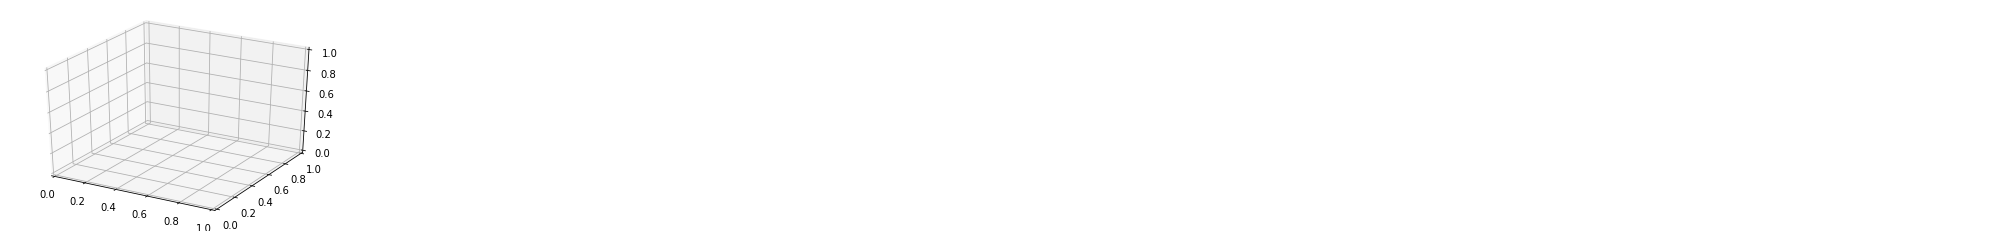

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


In [28]:
x_surf = np.linspace(df["assoc_org"].min(), df["assoc_org"].max())
y_surf = np.linspace(df["free_expr"].min(), df["free_expr"].max())
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

In [32]:
synthetic_data = pd.DataFrame({'assoc_org': x_surf.ravel(), 'free_expr': y_surf.ravel()})
preds = fit.predict(exog=synthetic_data)

In [33]:
ax.plot_surface(x_surf, y_surf, preds.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

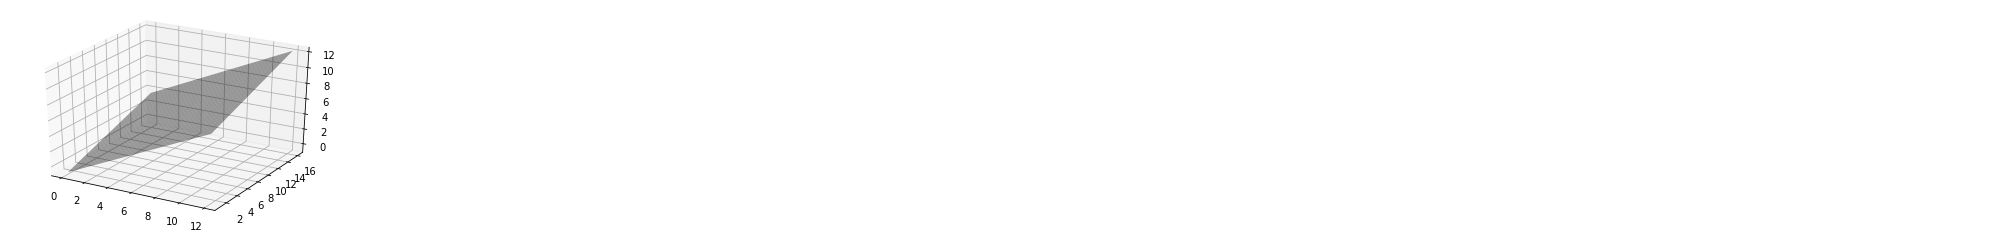

In [36]:
fig

In [37]:
ax.scatter(df['assoc_org'], df['free_expr'], df['elec_pros'],
           c='blue',
           marker='o',
           alpha=1)

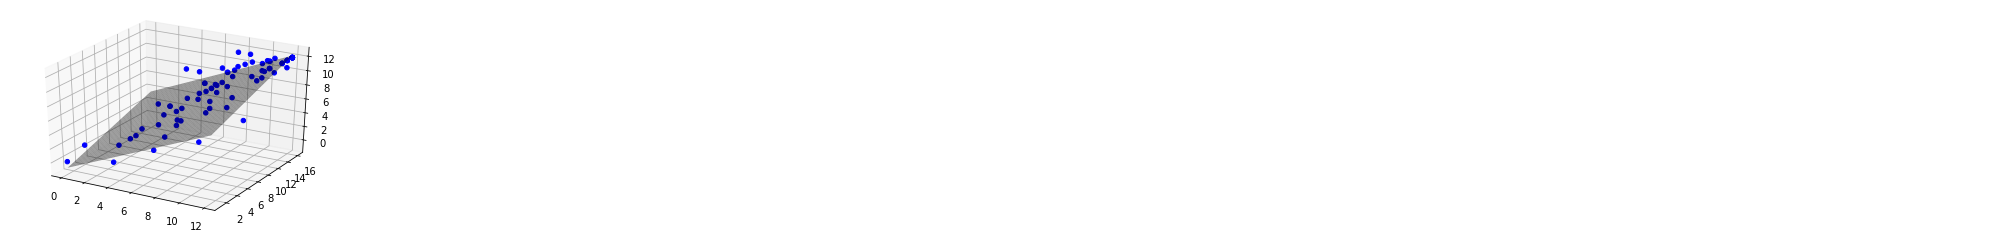

In [38]:
fig